In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [6]:
oliv = datasets.fetch_olivetti_faces()

In [9]:
# print(oliv.DESCR)
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [10]:
oliv['data'].shape

(400, 4096)

In [11]:
oliv['images'].shape

(400, 64, 64)

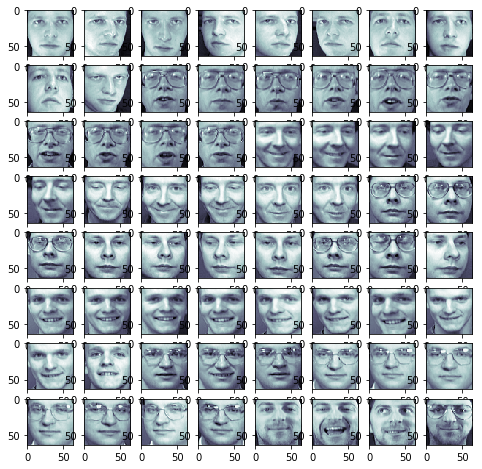

In [18]:
fig=plt.figure(figsize=(8,8)) # this 8 by 8 doesn't mean 8 rows and 8 columns , it just means size
for i in range(64): # only drawing 64 images
    ax = fig.add_subplot(8,8,i+1) # this means , I have 8 rows and 8 columns and I will place image at i+1 position in the grid
    ax.imshow(oli.images[i],cmap=plt.cm.bone)
plt.show()

In [19]:
x=oliv.data
y=oliv.target

In [21]:
pca=PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
pca.components_.shape
print("The total components are 400 as the number of componenets are given by min(number of training data points , number of feature)")
print("Each component will be a unit vector of length 4096")
print("The above 2 statements define the true essence of PCA")

The total components are 400 as the number of componenets are given by min(number of training data points , number of feature)
Each component will be a unit vector of length 4096
The above 2 statements define the true essence of PCA


##### NOW FIND THE OPTIMAL NUMBER OF COMPONENTS THAT WE NEED TO KEEP

In [33]:
k = 0
current = 0 
total = sum(pca.explained_variance_)
while current/total < 0.95:
    current += pca.explained_variance_[k]
    k += 1
print(k)
print("If we keep 260 components out of 400 then we will cover 99% of data")
print("If we keep 123 components out of 400 then we will cover 95% of data")

123
If we keep 260 components out of 400 then we will cover 99% of data
If we keep 123 components out of 400 then we will cover 95% of data


In [46]:
pca=PCA(n_components=k,whiten=True) # Whiten True implies , we will scale the PCA eigenvectors (individually) , such that their mean is 0 and variance is 1
# Whiten affects features after applying PCA so that they produce better results 
transformed_data=pca.fit_transform(x)
print(transformed_data.shape)
print("We have reduced the number of features from 4096 to 123 and still maintained 95% of data")

(400, 123)
We have reduced the number of features from 4096 to 123 and still maintained 95% of data


### Getting back all 4096 components from 123 components !

In [44]:
x_approx=pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [59]:
x_approx_images=x_approx.reshape((400,64,64))
x_approx_images.shape

(400, 64, 64)

##### Checking if the data that we are getting back from 123 components is distorted or not , basically has it changed a lot or not

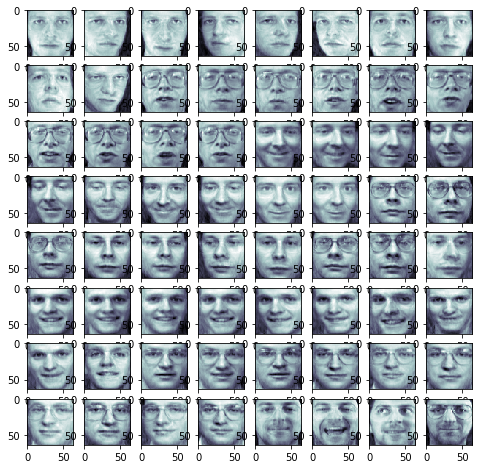

In [61]:
fig=plt.figure(figsize=(8,8)) # this 8 by 8 doesn't mean 8 rows and 8 columns , it just means size
for i in range(64): # only drawing 64 images
    ax = fig.add_subplot(8,8,i+1) # this means , I have 8 rows and 8 columns and I will place image at i+1 position in the grid
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

### WE SEE THAT THE IMAGES ARE ALMOST SIMILIAR TO THE ONES BEFORE , SO WE HAVE SUCCESSFULLY       .......................TRANSFORMED BACK INTO ORIGINAL DATA WITHOUT LOSS OF MUCH INFO

### Choose an appropiate classifier now for prediction

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [51]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

1.0
0.94


In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,clf.predict(x_test)))
print(classification_report(y_test,clf.predict(x_test)))

[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       1.00      1.00      1.00         4
          2       0.80      1.00      0.89         4
          3       1.00      1.00      1.00         2
          4       1.00      0.50      0.67         2
          5       0.75      1.00      0.86         3
          6       1.00      1.00      1.00         2
          7       1.00      0.50      0.67         2
          8       1.00      1.00      1.00         2
          9       1.00      1.00      1.00         2
         10       1.00      1.00      1.00         1
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         2
         14       1.00      1.00      1.00         1
         15       1.00      1.0

### NOW VISUALIZE WHAT EACH COMPONENT TELLS US

In [ ]:
eigenv=pca.components_
eigenv.shape

In [56]:
eigenfaces = eigenv.reshape([123,64,64])

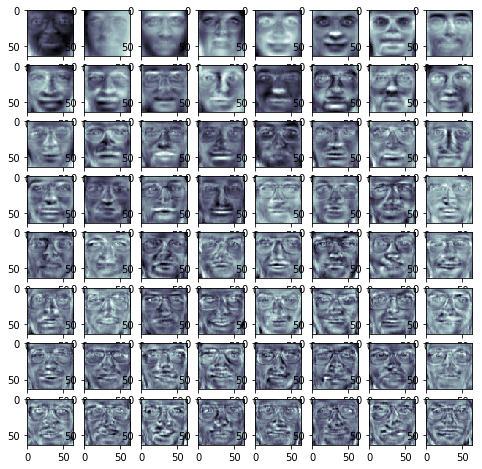

In [58]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()